# <font color=red>Лекция 6.3</font> <font color=blue>Библиотека Pandas</font>

 **Pandas** — это библиотека Python с открытым исходным кодом, предоставляющая высокопроизводительный инструмент для обработки и анализа данных с использованием его мощных структур данных. Название Pandas происходит от слова Panel Data — эконометрика из многомерных данных.

В 2008 году разработчик Уэс МакКинни начал разработку панд, когда им нужен высокопроизводительный, гибкий инструмент для анализа данных.

До Pandas Python в основном использовался для сбора и подготовки данных. Это имело очень небольшой вклад в анализ данных. Панды решили эту проблему. Используя Pandas, мы можем выполнить пять типичных шагов по обработке и анализу данных, независимо от происхождения данных — загрузить, подготовить, манипулировать, моделировать и анализировать.

Python с Pandas используется в широком спектре областей, включая академические и коммерческие области, включая финансы, экономику, статистику, аналитику и т. д. 
 #### Ключевые особенности Pandas

    - Быстрый и эффективный объект DataFrame с индивидуальной индексацией по умолчанию.
    - Инструменты для загрузки данных в объекты данных в памяти из разных форматов файлов.
    - Выравнивание данных и интегрированная обработка отсутствующих данных.
    - Изменение формы и поворот наборов дат.
    - Метка нарезки, индексация и подмножество больших наборов данных.
    - Столбцы из структуры данных могут быть удалены или вставлены.
    - Группировка по данным для агрегации и преобразований.
    - Высокая производительность слияния и объединения данных.
    - Функциональность временных рядов.


## DataFrame и Series

Чтобы эффективно работать с Pandas, необходимо освоить самые главные структуры данных библиотеки: DataFrame и Series. Без понимания что они из себя представляют, невозможно в дальнейшем проводить качественный анализ.


### Series

Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

In [ ]:
import pandas as pd
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

В строковом представлении объекта Series, индекс находится слева, а сам элемент справа. Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов. Также стоит обратить, что у Series есть тип хранимых элементов, в нашем случае это int64, т.к. мы передали целочисленные значения.

У объекта Series есть атрибуты через которые можно получить список элементов и индексы, это values: 

In [ ]:
my_series.values

и index соответственно:

In [ ]:
my_series.index

Доступ к элементам объекта Series возможны по их индексу (вспоминается аналогия со словарем и доступом по ключу).

In [ ]:
my_series[4]

Индексы можно задавать явно:

In [ ]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2['f']

Делать выборку по нескольким индексам:

In [ ]:
my_series2[['a', 'b', 'f']]

Осуществлять групповое присваивание:

In [ ]:
my_series2[['a', 'b', 'f']] = 0
my_series2

Можно фильтровать Series:

In [ ]:
my_series2[my_series2 > 0]

А также применять математические операции и многое другое:

In [ ]:
my_series2[my_series2 > 0] * 2

Series напоминает нам словарь, где ключом является индекс:

In [ ]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

А значением сам элемент:

In [ ]:
'd' in my_series3

У объекта Series и его индекса есть атрибут name, задающий имя объекту и индексу соответственно.

In [ ]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

Индекс можно поменять "на лету", присвоив список атрибуту index объекта Series

In [ ]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

Однако нужно иметь в виду, что список с индексами по длине должен совпадать с количеством элементов в Series.

### DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

DataFrame проще всего сконструировать на примере словаря:

In [ ]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
     })
df

Чтобы убедиться, что столбец в DataFrame это Series, извлекаем любой:

In [ ]:
df['country']

Смотрим тип:

In [ ]:
type(df['country'])

Объект DataFrame имеет 2 индекса: по строкам и по столбцам. Если индекс по строкам явно не задан (например, колонка по которой нужно их строить), то pandas задает целочисленный индекс RangeIndex от 0 до N-1, где N это количество строк в таблице.

In [ ]:
df.columns

В таблице у нас 4 элемента от 0 до 3.

In [ ]:
df.index

#### Доступ по индексу в DataFrame

Индекс по строкам можно задать разными способами, например, при формировании самого объекта DataFrame

In [ ]:
df = pd.DataFrame({
  'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
  'population': [17.04, 143.5, 9.5, 45.5],
  'square': [2724902, 17125191, 207600, 603628]
}, index=['-KZ-', '-RU-', '-BY-', '-UA-'])
df

или "на лету"

In [ ]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Country Code'
df

Как видно, индексу было задано имя - Country Code. Отметим, что объекты Series из DataFrame будут иметь те же индексы, что и объект DataFrame:

In [ ]:
df['country']

Доступ к строкам по индексу возможен несколькими способами:

    - .loc - используется для доступа по строковой метке

In [ ]:
df.loc['KZ']

    - .iloc - используется для доступа по числовому значению (начиная от 0)

In [ ]:
df.iloc[0]

Можно делать выборку по индексу и интересующим колонкам:

In [ ]:
df.loc[['KZ', 'RU'], 'population']

Как можно заметить, .loc в квадратных скобках принимает 2 аргумента: интересующий индекс, в том числе поддерживается слайсинг и колонки.

In [ ]:
df.loc['KZ':'BY', :]

Фильтровать DataFrame с помощью т.н. булевых массивов:

In [ ]:
df[df.population > 10][['country', 'square']]

Кстати, к столбцам можно обращаться, используя атрибут или нотацию словарей Python, т.е. **df.population** и **df['population']** это одно и то же.

Сбросить индексы можно вот так:

In [ ]:
df.reset_index()

Pandas при операциях над DataFrame, возвращает новый объект DataFrame.

Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность:

In [ ]:
df['density'] = df['population'] / df['square'] * 1000000
df

Можно  удалить любой столбец, если потребность в нем отпала:

In [ ]:
df.drop(['density'], axis='columns')

Еще один вариант удаления: **del df['density']**.

Переименовывать столбцы нужно через метод rename:

In [ ]:
df = df.rename(columns={'Country Code': 'country_code'})
df

В этом примере перед тем как переименовать столбец Country Code, убедитесь, что с него сброшен индекс, иначе не будет никакого эффекта.

#### Чтение и запись данных

Pandas поддерживает все самые популярные форматы хранения данных: csv, excel, sql, буфер обмена, html и многое другое:
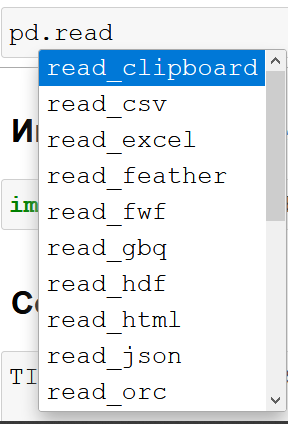
Чаще всего приходится работать с csv-файлами. Например, чтобы сохранить наш DataFrame со странами, достаточно написать:

In [ ]:
df.to_csv('files/PandasFolder/result.csv')

Функции to_csv ещё передаются различные аргументы (например, символ разделителя между колонками) о которых подробнее можно узнать в официальной документации.

Считать данные из csv-файла и превратить в DataFrame можно функцией read_csv.

In [ ]:
df = pd.read_csv('files/PandasFolder/result.csv', sep=',')
df

Аргумент sep указывает разделитесь столбцов. Существует еще масса способов сформировать DataFrame из различных источников, но наиболее часто используют CSV, Excel и SQL. Например, с помощью функции read_sql, pandas может выполнить SQL запрос и на основе ответа от базы данных сформировать необходимый DataFrame. За более подробной информацией стоит обратиться к официальной документации.

#### Группировка и агрегирование в pandas

Группировка данных один из самых часто используемых методов при анализе данных. В pandas за группировку отвечает метод .groupby. В качестве примера для дальнейшей работы представлен стандартный набор данных (dataset), использующийся во всех курсах про анализ данных — данные о пассажирах Титаника. (Путь к файлу: IS2/Material/lectures/Files/PandasFolder/titanic.csv)

In [ ]:
titanic_df = pd.read_csv('files/PandasFolder/titanic.csv')
print(titanic_df.head())

Необходимо подсчитать, сколько женщин и мужчин выжило, а сколько нет. В этом нам поможет метод .groupby.

In [ ]:
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count())

А теперь проанализируем в разрезе класса каюты:

In [ ]:
print(titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count())

#### Сводные таблицы в pandas

Термин "сводная таблица" хорошо известен тем, кто знаком с Microsoft Excel или любым иным, предназначенным для обработки и анализа данных. В Pandas сводные таблицы строятся через метод .pivot_table. За основу возьмем все тот же пример с Титаником. Например, перед нами стоит задача посчитать сколько всего женщин и мужчин было в конкретном классе корабля:

In [ ]:
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')
pvt

В качестве индекса теперь у нас будет пол человека, колонками станут значения из PClass, функцией агрегирования будет count (подсчет количества записей) по колонке Name.

In [ ]:
print(pvt.loc['female', ['1st', '2nd', '3rd']])

#### Анализ временных рядов

В Pandas очень удобно анализировать временные ряды. В качестве  примера будем использовать цену на акции корпорации Apple за 5 лет по дням. (Путь к файлу: IS2/Material/lectures/Files/PandasFolder/apple.csv)

In [ ]:
df = pd.read_csv('files/PandasFolder/apple.csv', index_col='Date', parse_dates=True)
df = df.sort_index()
print(df.info())

Здесь мы формируем DataFrame с DatetimeIndex по колонке Date и сортируем новый индекс в правильном порядке для работы с выборками. Если колонка имеет формат даты и времени отличный от ISO8601, то для правильного перевода строки в нужный тип, можно использовать метод [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Узнаем среднюю цену акции (mean) на закрытии (Close):

In [ ]:
df.loc['2012-Feb', 'Close'].mean()

А если взять промежуток с февраля 2012 по февраль 2015 и посчитать среднее:

In [ ]:
df.loc['2012-Feb':'2017-Feb', 'Close'].mean()

Если нам нужно узнать среднюю цену закрытия по неделям:

In [ ]:
df.resample('W')['Close'].mean()

Resampling мощный инструмент при работе с временными рядами (time series), помогающий переформировать выборку так, как удобно вам. Метод resample первым аргументом принимает строку rule. Все доступные значения можно найти в документации.

#### Визуализация данных в pandas

Для визуального анализа данных, Pandas использует библиотеку Matplotlib. Продемонстрирую простейший способ визуализации в Pandas на примере с акциями Apple.

Берем цену закрытия в промежутке между 2012 и 2017.

In [ ]:
import matplotlib.pyplot as plt
new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()

По оси X, если не задано явно, всегда будет индекс. По оси Y в нашем случае цена закрытия. Если внимательно посмотреть, то в 2014 году цена на акцию резко упала, это событие было связано с тем, что Apple проводила сплит 7 к 1.

#### Полезные ссылки

   [Pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
   
   [Официальная документация Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)
   
   [Почему Python](https://khashtamov.com/2016/06/why-python/)
   
   [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

### Импорт библиотеки

In [ ]:
import pandas as pd

### Constants

In [ ]:
TITANIC_CSV_DATA_URL = "http://vincentarelbundock.github.io/Rdatasets/csv/datasets/Titanic.csv"

# Original column's names.
INDEX_COL = 0
NAME_COL = "Name"
SEX_COL = "Sex"
PCLASS_COL = "PClass"
AGE_COL = "Age"
SURVIVED_COL = "Survived"

# New column's names.
AGE_GROUP_COL = "AgeGroup"

# Other constants.
HEAD_ROWS_TO_SHOW = 15

# Data load

In [ ]:
df = pd.read_csv(TITANIC_CSV_DATA_URL)
df[:HEAD_ROWS_TO_SHOW]

In [ ]:
df = pd.read_csv(TITANIC_CSV_DATA_URL, index_col=INDEX_COL)
df[:HEAD_ROWS_TO_SHOW]

# Analyze of data types

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.shape

# Categorical features

In [ ]:
df[SEX_COL][:HEAD_ROWS_TO_SHOW]

In [ ]:
df[SEX_COL].value_counts()

In [ ]:
df[PCLASS_COL].value_counts()

In [ ]:
df[PCLASS_COL].value_counts().plot.pie()

# Quantitative features

In [ ]:
df[AGE_COL].mean()

In [ ]:
df[AGE_COL].plot(kind="hist")

In [ ]:
df[AGE_COL].value_counts()

In [ ]:
df[AGE_GROUP_COL] = df[AGE_COL].map(lambda age: int(age // 10))
df[:HEAD_ROWS_TO_SHOW]

In [ ]:
df[AGE_GROUP_COL] = df[AGE_COL]
df[AGE_GROUP_COL].fillna(-1, inplace=True)
df[AGE_GROUP_COL] = df[AGE_GROUP_COL].map(lambda age: int(age // 10) + 1)
df[:HEAD_ROWS_TO_SHOW]

In [ ]:
df[AGE_GROUP_COL].value_counts()

In [ ]:
df[AGE_GROUP_COL].value_counts().plot.pie()

# Investigation of the correlation between 2 features

In [ ]:
df[[AGE_GROUP_COL, SURVIVED_COL]][:HEAD_ROWS_TO_SHOW]

In [ ]:
age_by_survived = df.groupby([AGE_GROUP_COL, SURVIVED_COL])
age_by_survived

In [ ]:
age_by_survived.size()

In [ ]:
age_by_survived = age_by_survived.size().unstack()
age_by_survived

In [ ]:
age_by_survived.fillna(0).plot(kind='barh', stacked=True)

In [ ]:
age_by_survived_without_na = age_by_survived[1:].fillna(0)
age_by_survived_without_na

In [ ]:
age_by_survived_without_na.plot(kind='barh', stacked=True)

In [ ]:
def map_to_percent(r):
  return [float(v)/sum(r) for v in r]

age_by_survived_without_na.apply(map_to_percent, axis=1)

In [ ]:
age_by_survived_without_na.apply(map_to_percent, axis=1).plot(kind='barh', stacked=True)

In [ ]:
df.groupby([SEX_COL, SURVIVED_COL]).size().unstack().fillna(0).apply(map_to_percent, axis=1).plot(kind="barh", stacked=True)

In [ ]:
df.groupby([PCLASS_COL, SURVIVED_COL]).size().unstack().fillna(0).apply(map_to_percent, axis=1).plot(kind="barh", stacked=True)